# Mini-projet IA (classification) :  
## Risques Cardiovasculaires

### 1. Data understanding (compréhension des données) : 

##### Chargement et affichage des données

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Chargement des données
dataset = pd.read_csv("Cardiovascular_Diseases.csv" ,sep=',' ,low_memory=False)
target_column = "Heart_Disease"

#Affichage des données
dataset.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


##### Description

In [13]:
#volume : nombre total d'instances
#dimension : nombre total des attributs

print("(volume , dimension) =" ,dataset.shape)

(volume , dimension) = (308854, 19)


In [14]:
#Informations sur les types  et le  codage de données 
dataset.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                      object
BMI                              object
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [15]:
#Informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299287 non-null  float64
 12  Weight_(kg)                   299311 non-nul

<div class="alert alert-info">
<h3>Note</h3>
<p>
    BMI et le Weight_(kg) sont considérés des objets , donc il faut les transformer en valeur numérique.
</p>
</div>

In [16]:
#Statistiques descriptives
print(dataset.describe(include='all'))

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                299312   299312        299312   
unique           9547                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           107449                231520   232412        275231   
mean              NaN                   NaN      NaN           NaN   
std               NaN                   NaN      NaN           NaN   
min               NaN                   NaN      NaN           NaN   
25%               NaN                   NaN      NaN           NaN   
50%               NaN                   NaN      NaN           NaN   
75%               NaN                   NaN      NaN           NaN   
max               NaN                   NaN      NaN           NaN   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       299312       299312     299312   299312    299312  299312   
unique       

<div class="alert alert-warning">
<h3>Note</h3>
<p>
  Les attributs numériques tels que la taille, le poids et l'indice de masse corporelle (BMI) présentent une variabilité significative, avec des écarts-types élevés indiquant une dispersion importante des données autour de la moyenne. Par exemple, la taille moyenne est de 170.72 cm avec un écart-type de 10.65 cm. Les attributs catégoriels tels que l'état de santé général, la pratique d'exercices physiques et les antécédents médicaux montrent une diversité de réponses, avec des valeurs uniques et des fréquences variables. Par exemple, la majorité des individus déclarent avoir une santé générale "Très bonne", tandis que la pratique d'exercices est majoritairement signalée comme "Oui". Ces statistiques offrent un aperçu précieux de la distribution et de la variabilité des données, ce qui peut être utile pour identifier les tendances et les valeurs aberrantes potentielles dans notre ensemble de données sur les maladies cardiovasculaires.  
</p>
</div>

In [17]:
print(dataset.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


##### visualisation


Heart_Disease
No     275231
Yes     24081
Name: count, dtype: int64


Text(0.5, 1.0, 'Heart_Disease')

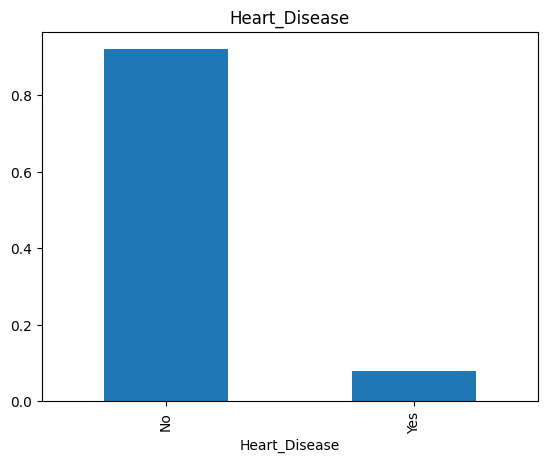

In [18]:
print(dataset[target_column].value_counts())
dataset.Heart_Disease.value_counts(normalize=True).plot(kind='bar', alpha=1)
plt.title('Heart_Disease')

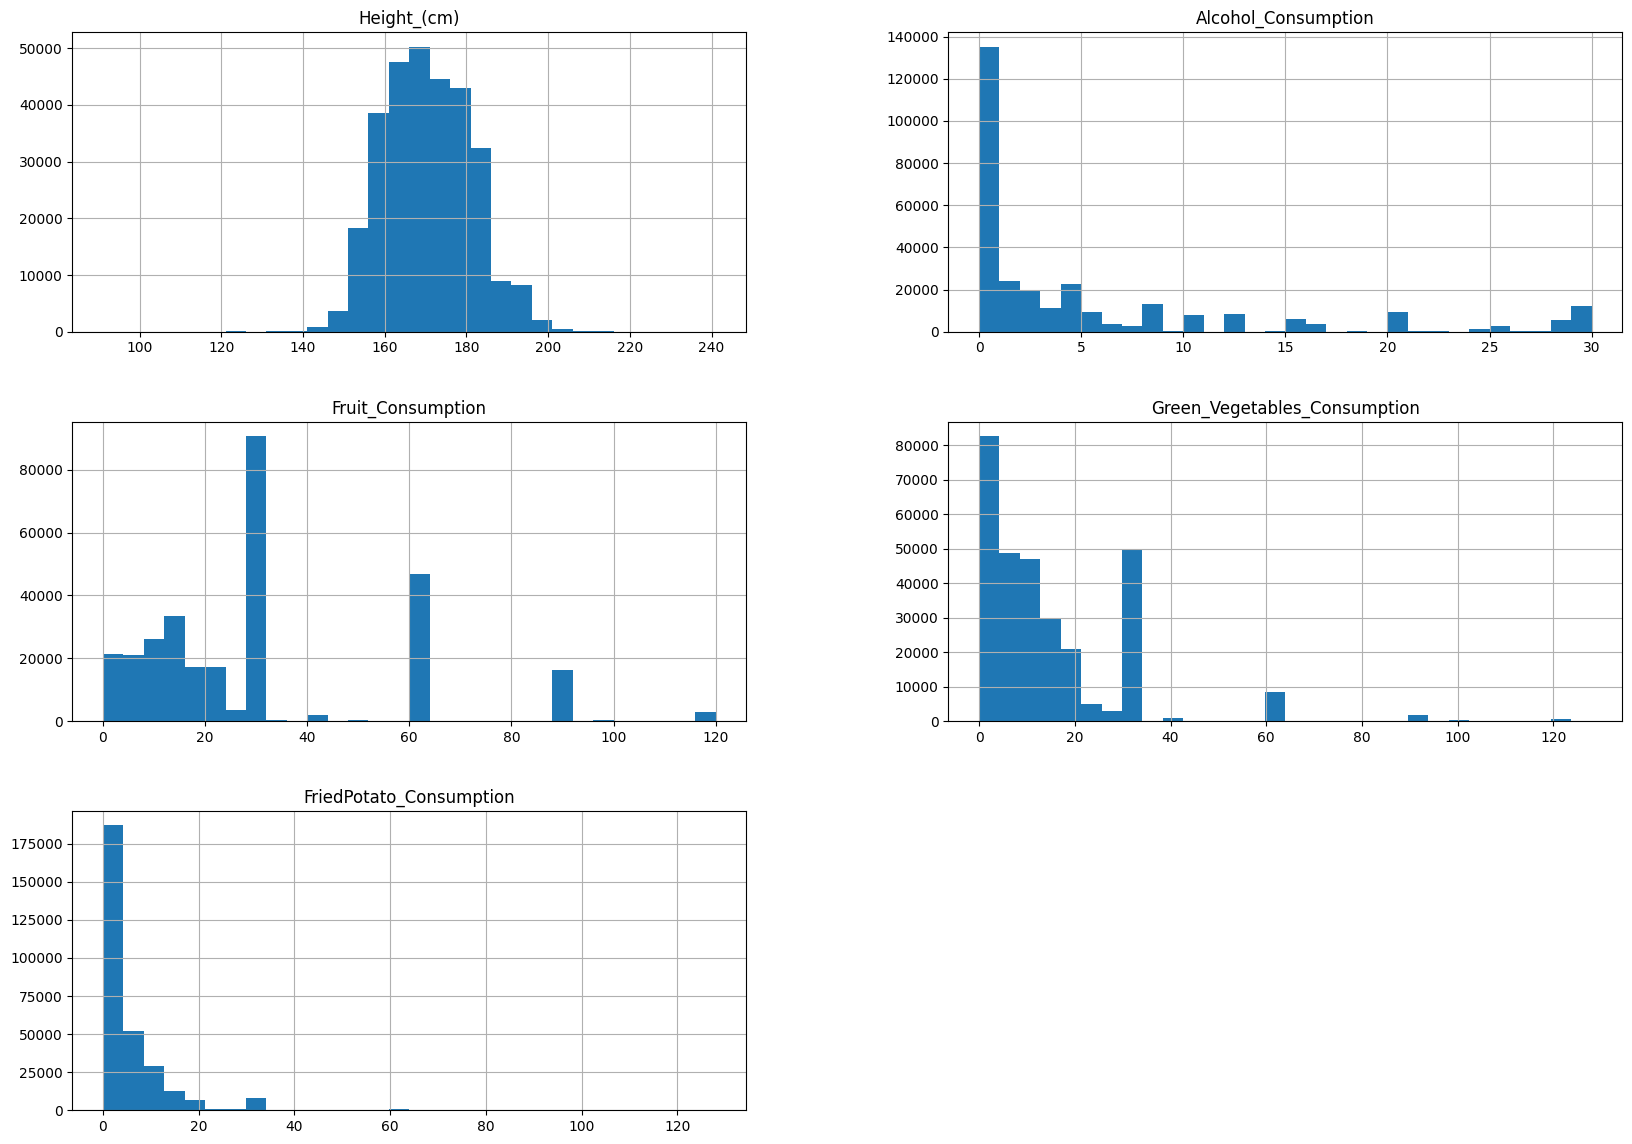

In [20]:
_ = dataset.hist(figsize=(20, 14),bins=30 )

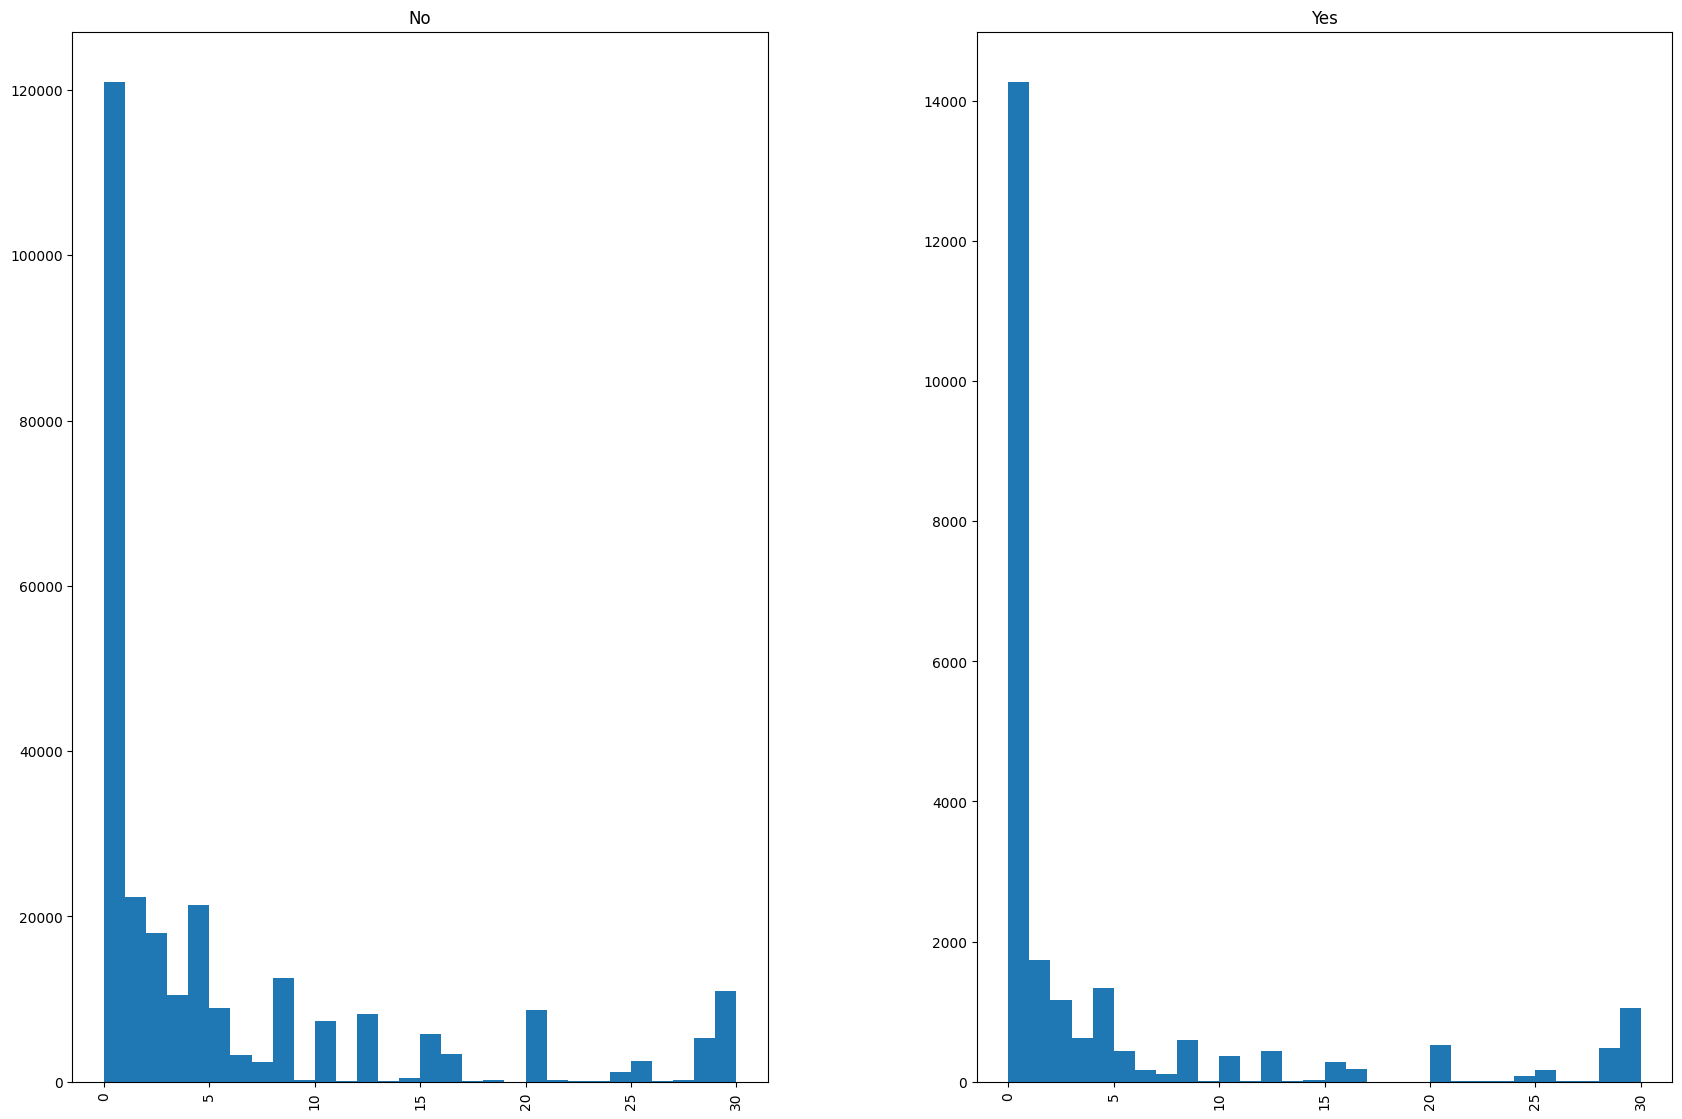

In [25]:
_ = dataset.hist(figsize=(20, 14),bins=30 ,column='Alcohol_Consumption', by='Heart_Disease')

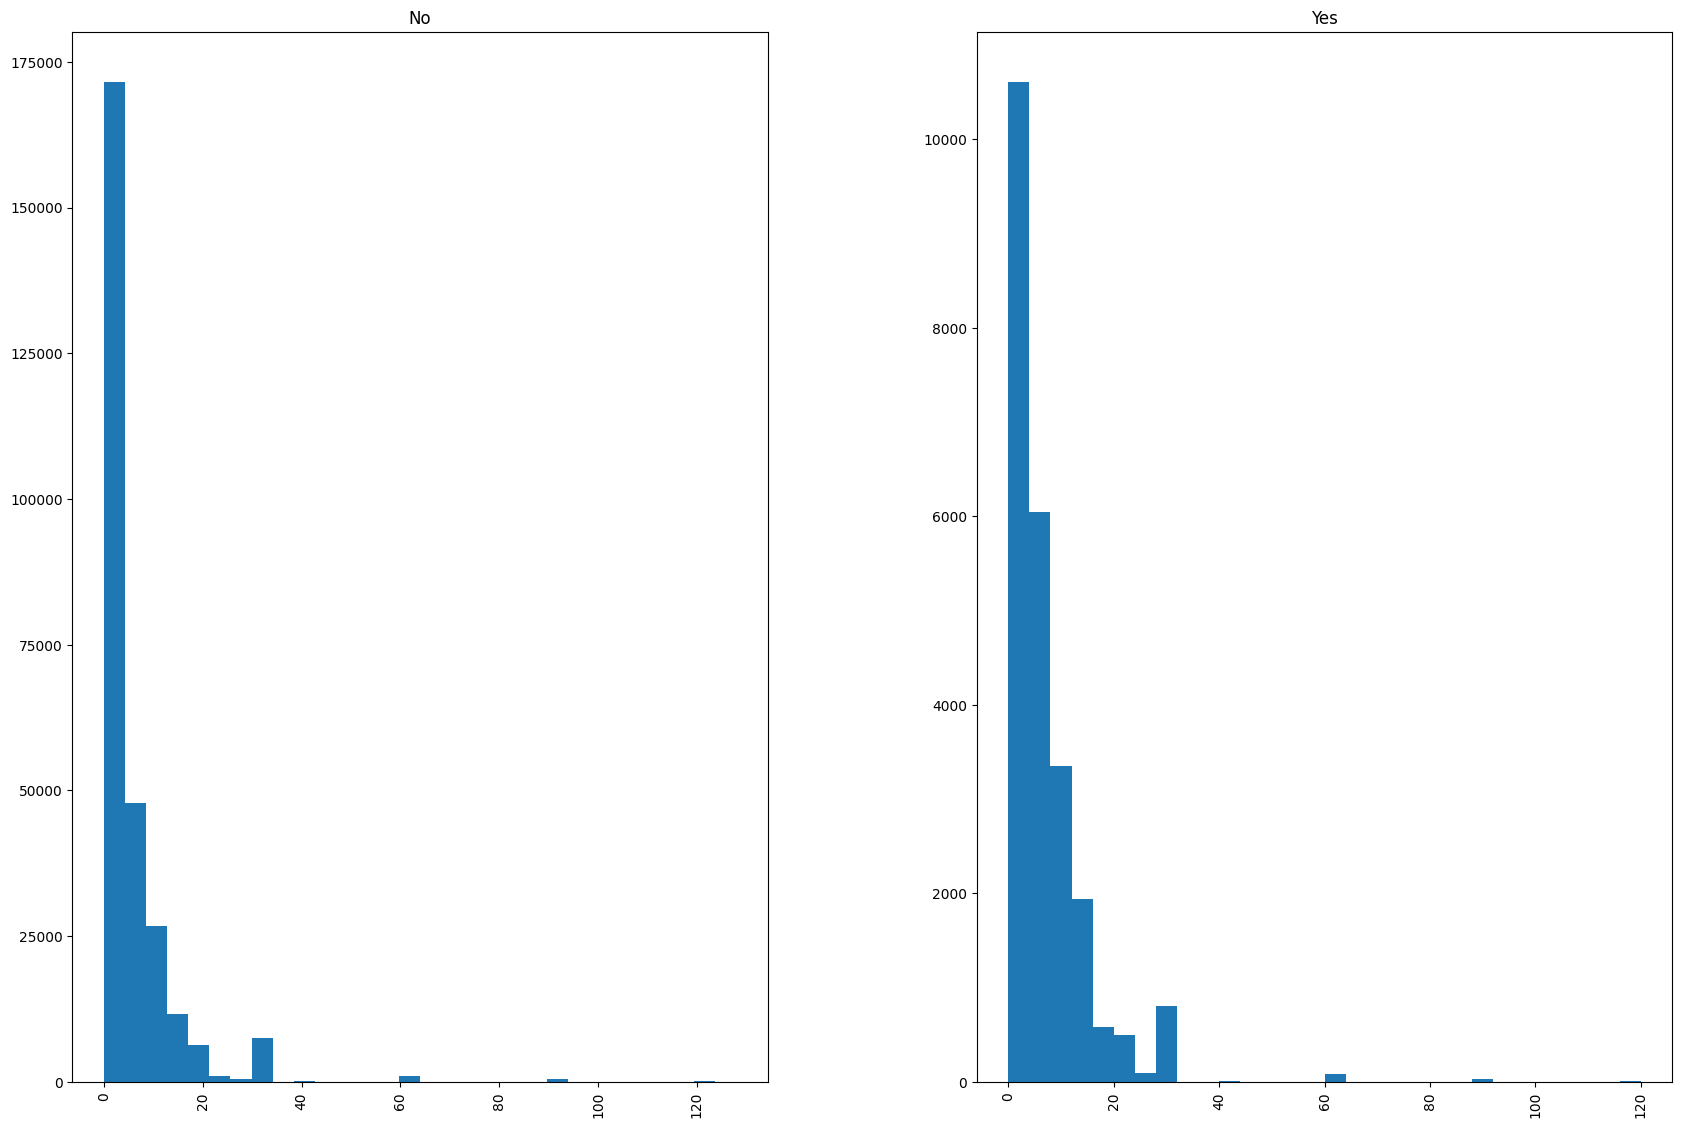

In [26]:
_ = dataset.hist(figsize=(20, 14),bins=30 ,column='FriedPotato_Consumption', by='Heart_Disease')

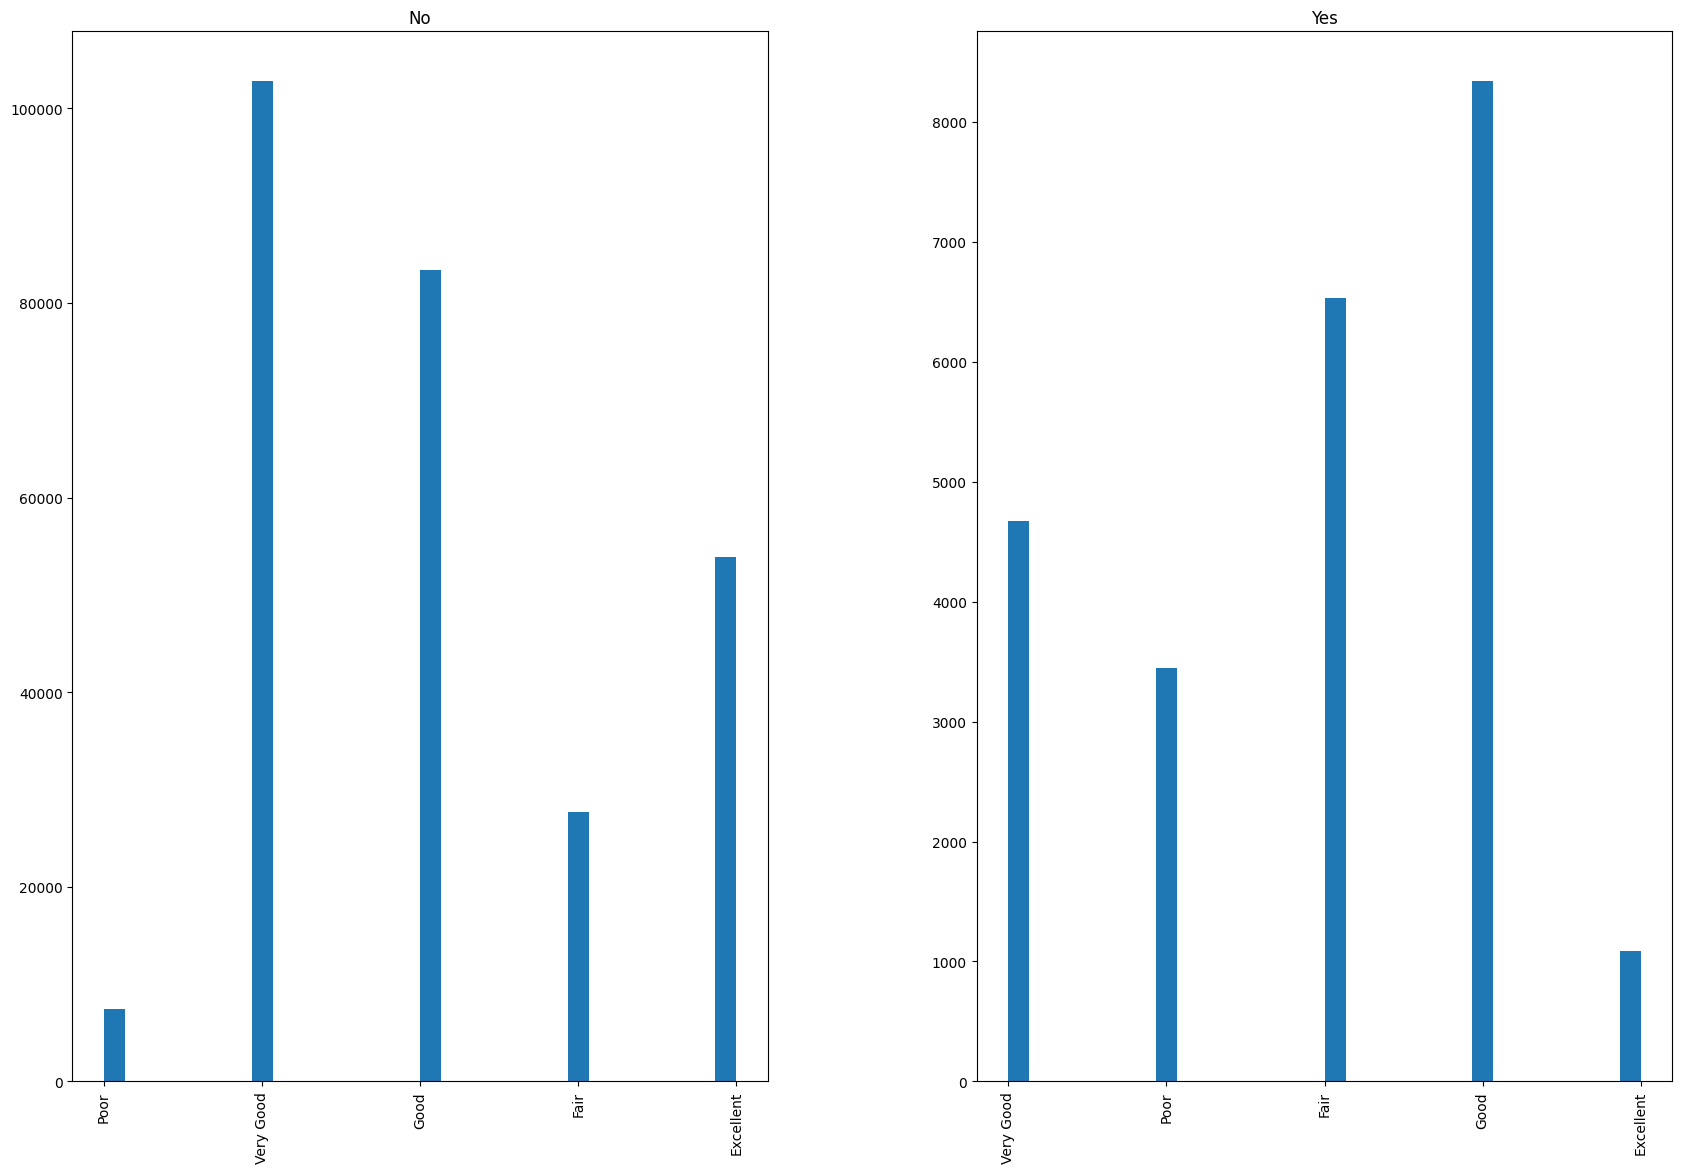

In [24]:
_ = dataset.hist(figsize=(20, 14),bins=30 ,column='General_Health', by='Heart_Disease')

In [21]:
columns = dataset.columns
object_columns = dataset.drop(dataset.columns[3], axis=1).select_dtypes(include='object').columns.tolist()# Print the names of object columns
print(object_columns)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History']


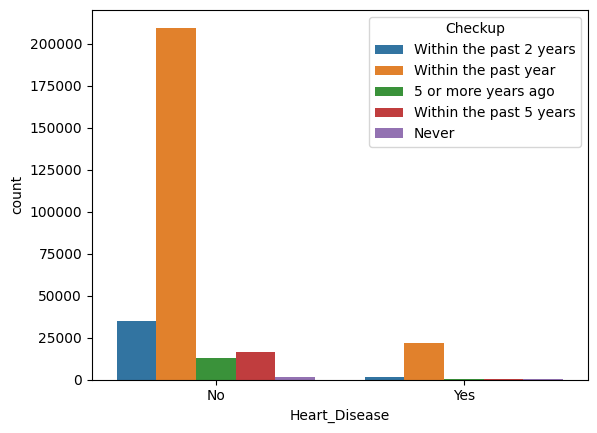

In [27]:
sns.countplot(x =target_column , hue = "Checkup", data = dataset)
plt.show()

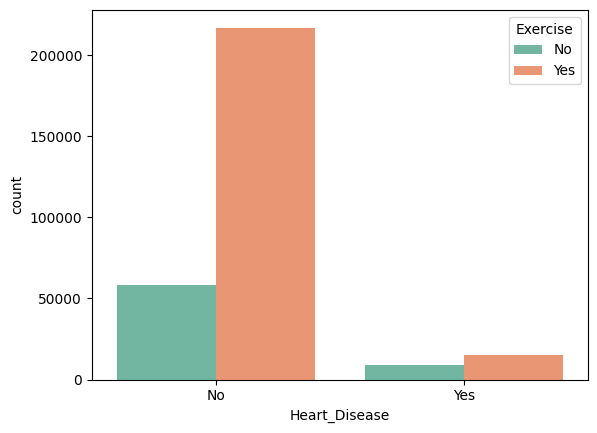

In [28]:
sns.countplot(x =target_column , hue = 'Exercise', data = dataset ,palette = "Set2")
plt.show()

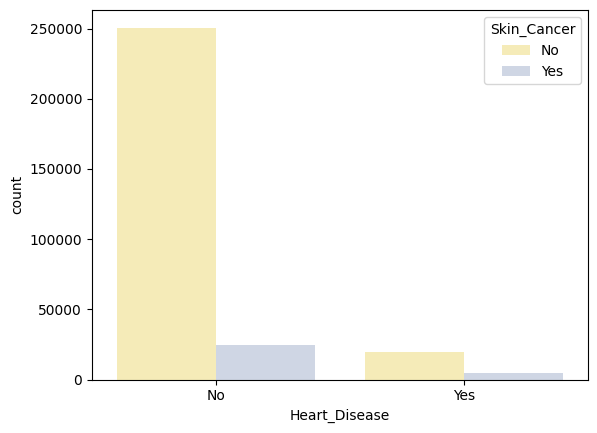

In [29]:
sns.countplot(x =target_column , hue = 'Skin_Cancer', data = dataset , palette = "Pastel2_r")
plt.show()

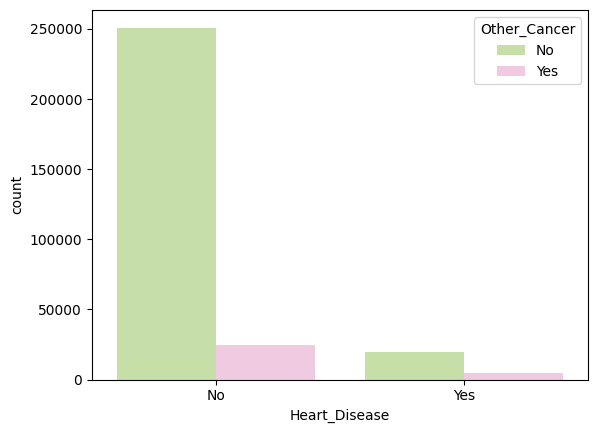

In [30]:
sns.countplot(x =target_column , hue = 'Other_Cancer', data = dataset ,palette = "PiYG_r" )
plt.show()

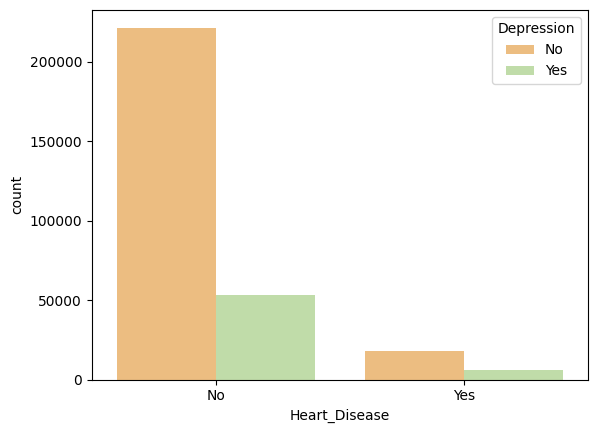

In [31]:
sns.countplot(x =target_column , hue = 'Depression', data = dataset ,palette = "Spectral")
plt.show()

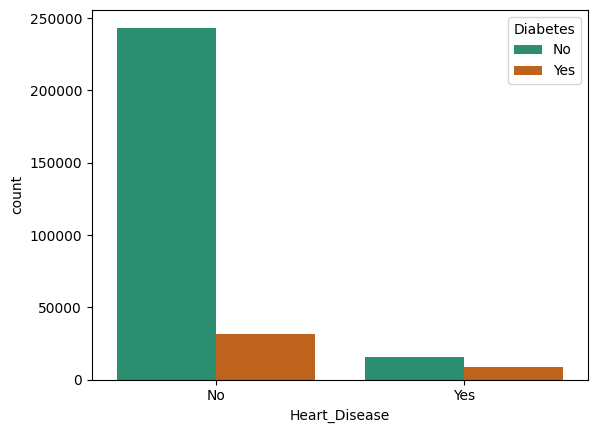

In [32]:
sns.countplot(x =target_column , hue = 'Diabetes', data = dataset , palette = "Dark2")
plt.show()

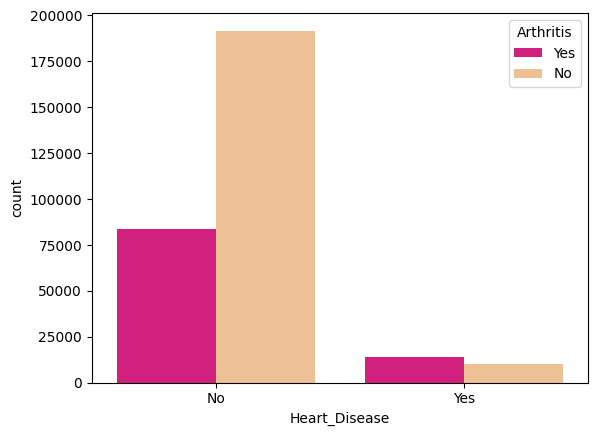

In [33]:
sns.countplot(x =target_column , hue = 'Arthritis', data = dataset , palette = "Accent_r")
plt.show()

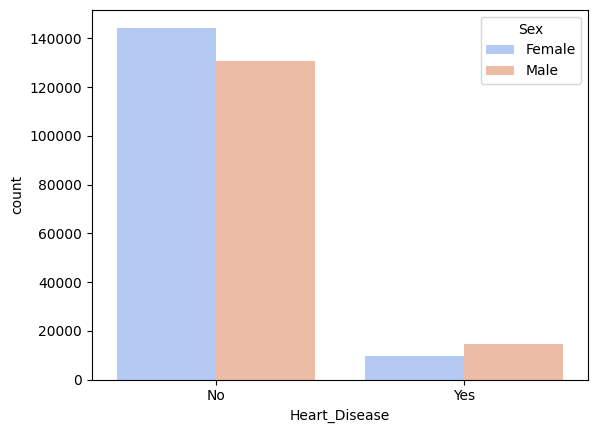

In [34]:
sns.countplot(x =target_column , hue = 'Sex', data = dataset , palette='coolwarm')
plt.show()

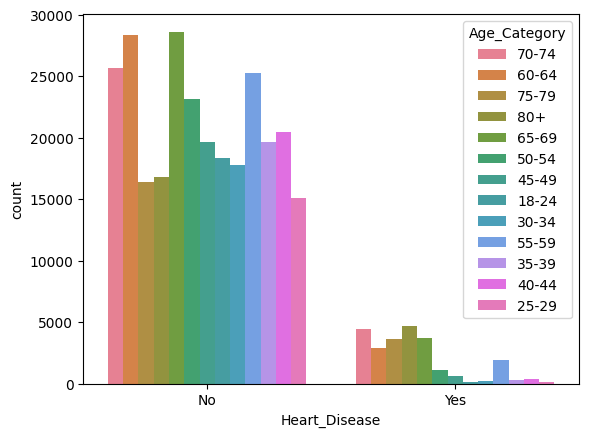

In [35]:
sns.countplot(x =target_column , hue = 'Age_Category', data = dataset)
plt.show()

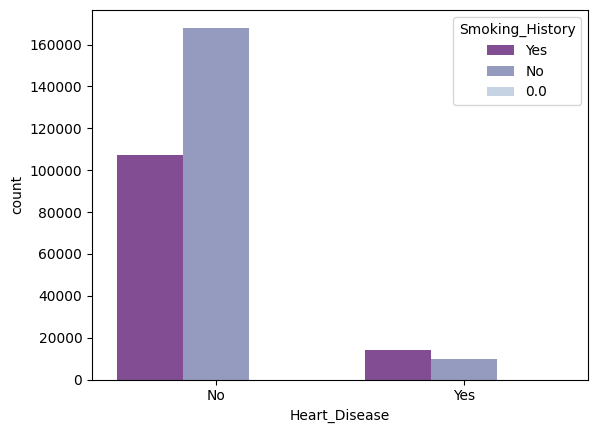

In [36]:
sns.countplot(x =target_column , hue ='Smoking_History', data = dataset , palette='BuPu_r')
plt.show()

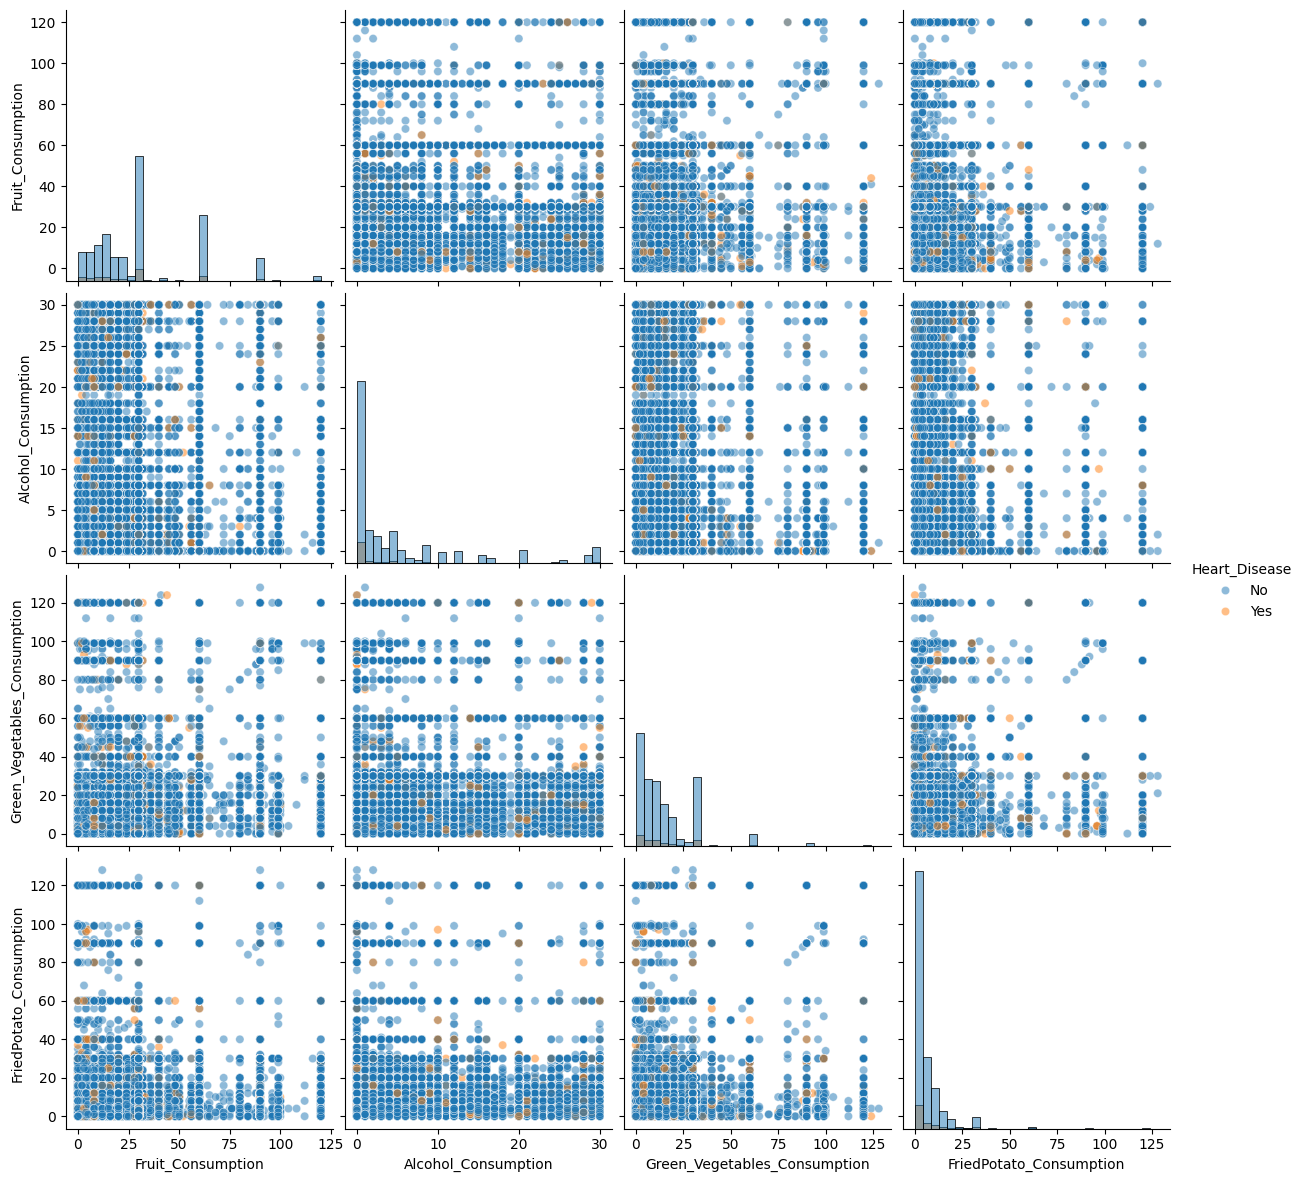

In [39]:
columns = ["Fruit_Consumption" , "Alcohol_Consumption" , "Green_Vegetables_Consumption" , "FriedPotato_Consumption" ]
_ = sns.pairplot(
    data=dataset,
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.5},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30}
)

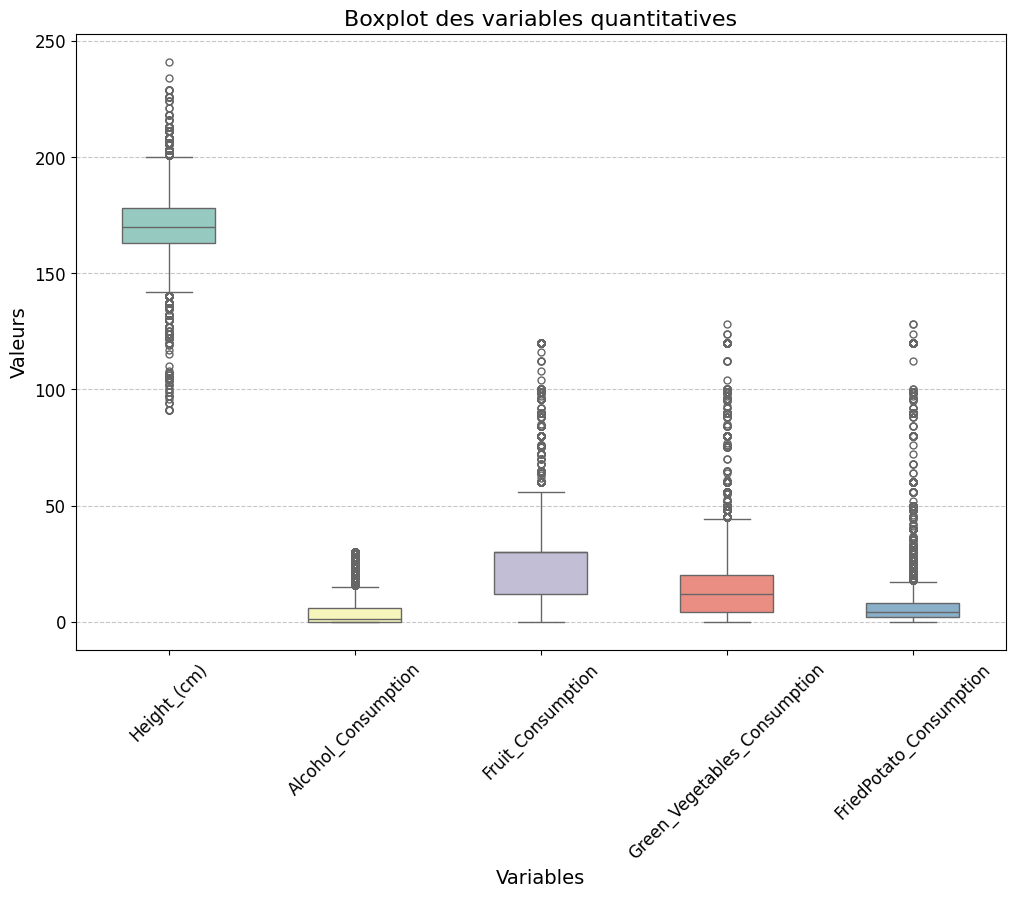

In [40]:
#boite à moustache:
#dataset.plot(kind='box', figsize=(15,5),x="Heart_Disease", y=["Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption","Height_(cm)"])
#plt.show()
quantis = dataset.select_dtypes(include=['float64'])
plt.figure(figsize=(12, 8))

# Utilisation de la palette de couleurs de seaborn
sns.set_palette("Set3")

# Utilisation de la fonction boxplot de seaborn
sns.boxplot(data=quantis, orient='v', width=0.5, fliersize=5)

# Rotation des labels sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12)

plt.title("Boxplot des variables quantitatives", fontsize=16)
plt.ylabel("Valeurs", fontsize=14)
plt.xlabel("Variables", fontsize=14)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

<Axes: >

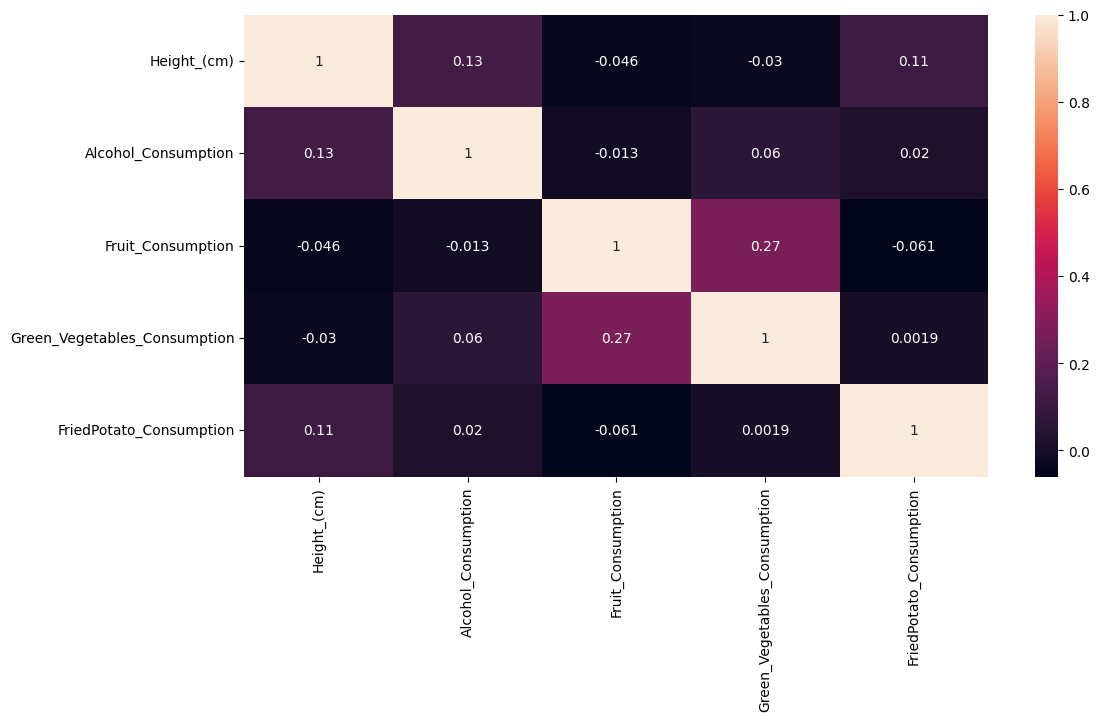

In [43]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,6))
corr=quantis.corr()
sns.heatmap(corr,annot=True)

<div class="alert alert-info">
<h3>Interpretation</h3>
<p>
    
</p>
</div>

### 2. Nettoyage de données

#### doublons

In [4]:
# Afficher le nombre de doublons
print("Nombre de doublons avant suppression: ", dataset.duplicated().sum())

# Supprimer les doublons
no_dup= dataset.drop_duplicates()

# Afficher le nombre de doublons après suppression
print("Nombre de doublons après suppression: ", no_dup.duplicated().sum())


Nombre de doublons avant suppression:  80
Nombre de doublons après suppression:  0


#### valeurs manquantes

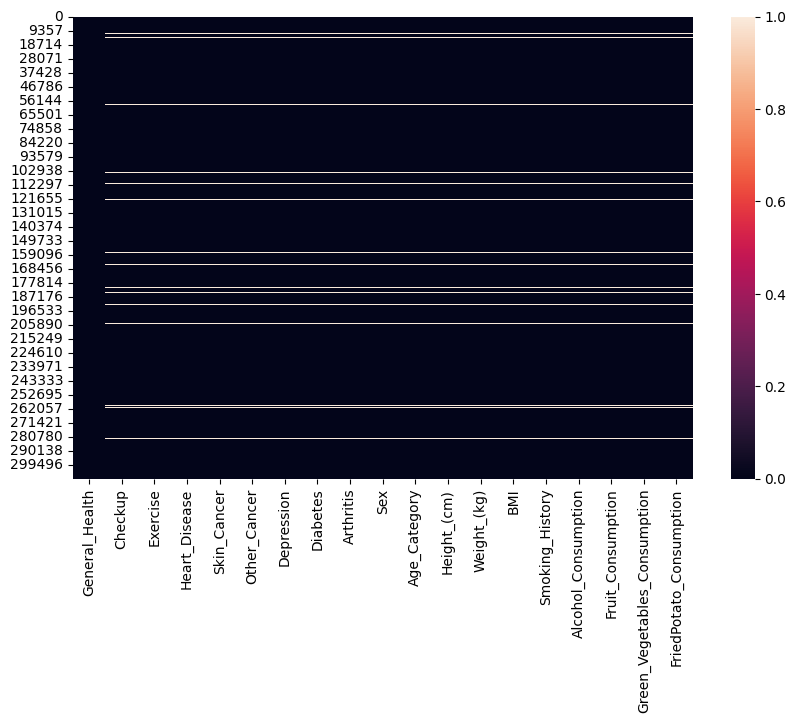

In [5]:
# Visualizing the missing values using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(no_dup.isnull())
plt.show()


In [6]:
#il serait donc mieux de supprimer les valeurs manquantes
no_dup.isnull().sum()
print("\nNombre de valeurs manquantes avant traitement: ")
print(no_dup.isnull().sum())
#Delete the rows with missing values
no_null = no_dup.dropna()
# Afficher le nombre de valeurs manquantes après traitement
print("\nNombre de valeurs manquantes après traitement: ")
print(no_null.isnull().sum())


Nombre de valeurs manquantes avant traitement: 
General_Health                     0
Checkup                         9542
Exercise                        9542
Heart_Disease                   9542
Skin_Cancer                     9542
Other_Cancer                    9542
Depression                      9542
Diabetes                        9542
Arthritis                       9542
Sex                             9542
Age_Category                    9542
Height_(cm)                     9567
Weight_(kg)                     9543
BMI                             9542
Smoking_History                 9542
Alcohol_Consumption             9542
Fruit_Consumption               9542
Green_Vegetables_Consumption    9542
FriedPotato_Consumption         9543
dtype: int64

Nombre de valeurs manquantes après traitement: 
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer    

In [13]:
no_null.shape

(299205, 19)

#### transformer le poids et le BMI à float

In [7]:
# transform weight and height to numerical values
trans = no_null.copy()
trans['Weight_(kg)'] = trans['Weight_(kg)'].replace(' ', np.nan)
trans['BMI'] = trans['BMI'].replace(' ', np.nan)
trans['Weight_(kg)'] = trans['Weight_(kg)'].astype(float)
trans['BMI'] = trans['BMI'].astype(float)
trans.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

#### Valeurs aberrantes

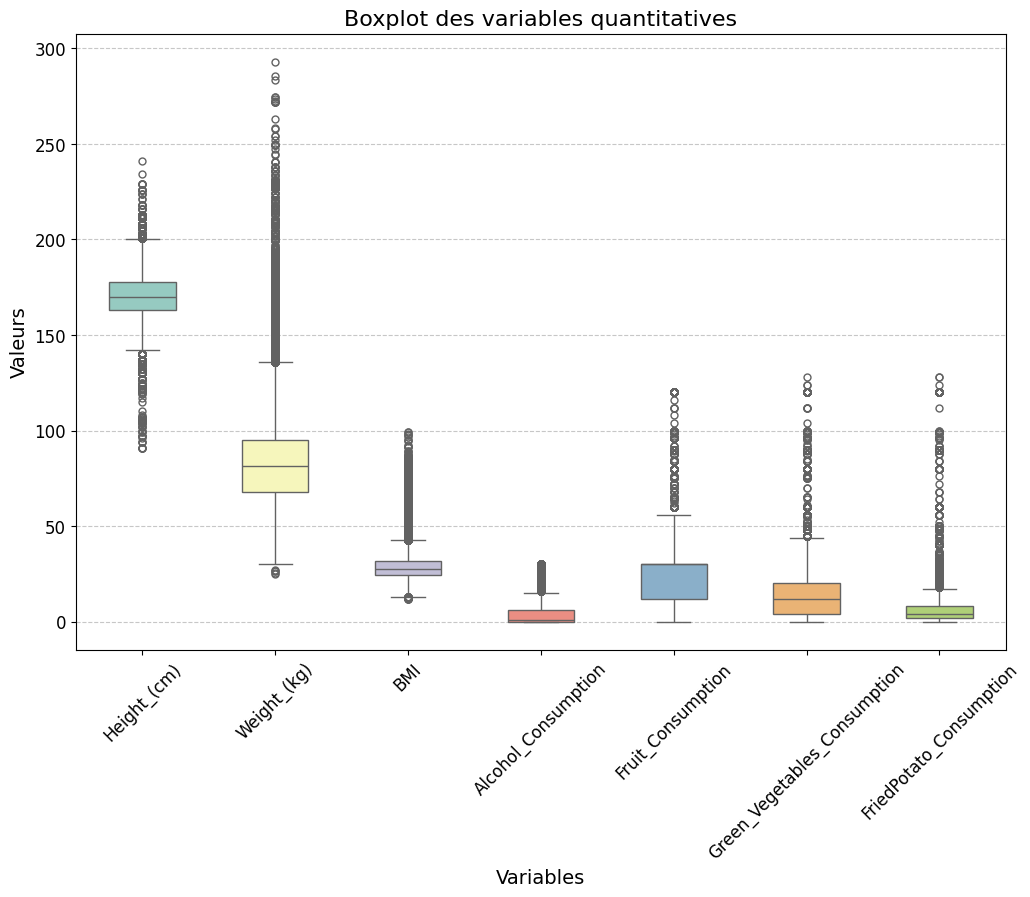

In [23]:
plt.figure(figsize=(12, 8))

# Utilisation de la palette de couleurs de seaborn
sns.set_palette("Set3")
draft=trans.copy()

# Utilisation de la fonction boxplot de seaborn
sns.boxplot(data=draft, orient='v', width=0.5, fliersize=5)

# Rotation des labels sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12)

plt.title("Boxplot des variables quantitatives", fontsize=16)
plt.ylabel("Valeurs", fontsize=14)
plt.xlabel("Variables", fontsize=14)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [24]:
#traitement des valeurs aberrantes:
#Height_(cm)
q1=draft["Height_(cm)"].quantile(q=0.25)
q3=draft["Height_(cm)"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Height_(cm)"]<borne_sup]
draft=draft[draft["Height_(cm)"]>borne_inf]

In [25]:
#Weight_(kg)
q1=draft["Weight_(kg)"].quantile(q=0.25)
q3=draft["Weight_(kg)"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Weight_(kg)"]<borne_sup]
draft=draft[draft["Weight_(kg)"]>borne_inf]

In [26]:
#BMI
q1=draft["BMI"].quantile(q=0.25)
q3=draft["BMI"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["BMI"]<borne_sup]
draft=draft[draft["BMI"]>borne_inf]

In [27]:
#Alcohol_Consumption
q1=draft["Alcohol_Consumption"].quantile(q=0.25)
q3=draft["Alcohol_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Alcohol_Consumption"]<borne_sup]
draft=draft[draft["Alcohol_Consumption"]>borne_inf]

In [28]:
#Fruit_Consumption
q1=draft["Fruit_Consumption"].quantile(q=0.25)
q3=draft["Fruit_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Fruit_Consumption"]<borne_sup]
draft=draft[draft["Fruit_Consumption"]>borne_inf]

In [29]:
#Green_Vegetables_Consumption
q1=draft["Green_Vegetables_Consumption"].quantile(q=0.25)
q3=draft["Green_Vegetables_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["Green_Vegetables_Consumption"]<borne_sup]
draft=draft[draft["Green_Vegetables_Consumption"]>borne_inf]

In [30]:
#FriedPotato_Consumption
q1=draft["FriedPotato_Consumption"].quantile(q=0.25)
q3=draft["FriedPotato_Consumption"].quantile(q=0.75)
IQR=q3-q1
borne_inf = q1-1.5*IQR
borne_sup = q3 +1.5*IQR
draft= draft[draft["FriedPotato_Consumption"]<borne_sup]
draft=draft[draft["FriedPotato_Consumption"]>borne_inf]

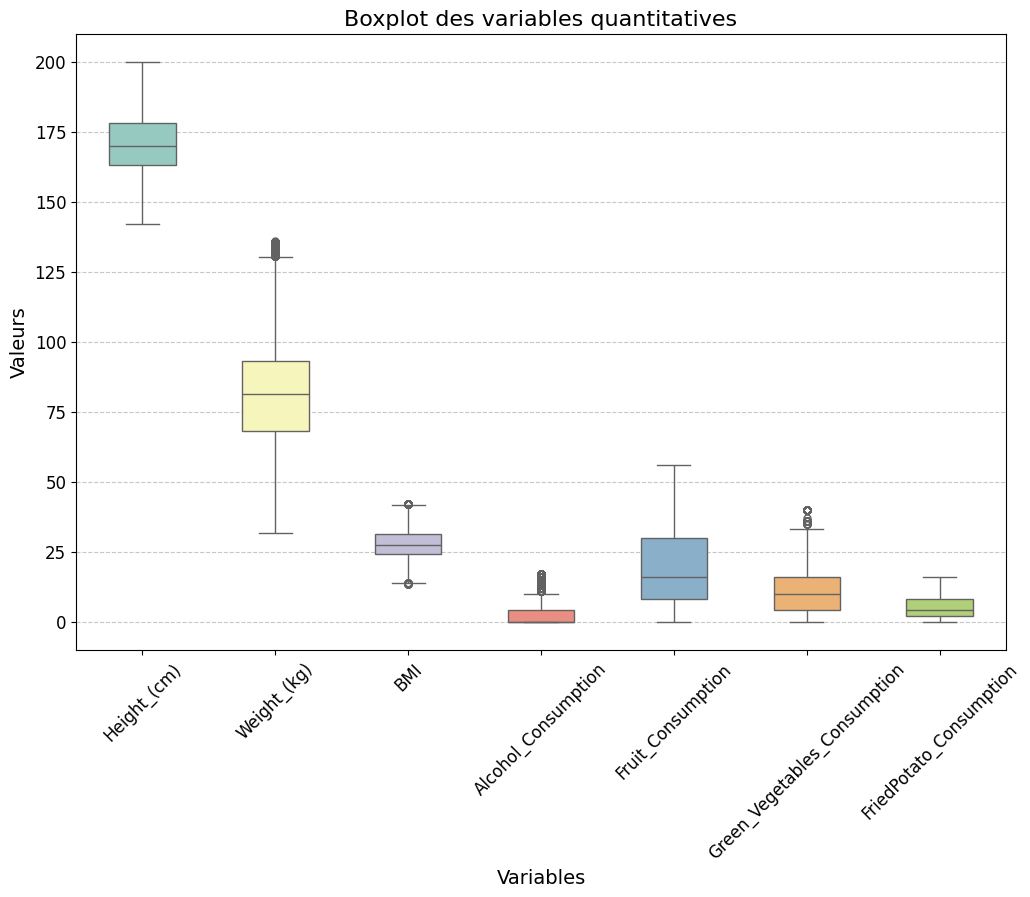

In [31]:
plt.figure(figsize=(12, 8))

# Utilisation de la palette de couleurs de seaborn
sns.set_palette("Set3")
# Utilisation de la fonction boxplot de seaborn
sns.boxplot(data=draft, orient='v', width=0.5, fliersize=5)

# Rotation des labels sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, fontsize=12)

plt.title("Boxplot des variables quantitatives", fontsize=16)
plt.ylabel("Valeurs", fontsize=14)
plt.xlabel("Variables", fontsize=14)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnalisation des axes
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### convert categorical data

In [32]:
draft.shape

(179854, 19)

In [20]:
#les valeurs distinctes de chaque colonne de type object
columns_object = draft.select_dtypes(include=['object']).columns
for column in columns_object:
    print(column, draft[column].unique())